<a href="https://colab.research.google.com/github/reeennico/Processamento-Digital-de-Sinais/blob/main/GE_Cap%C3%ADtulo_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Capítulo 4: A Transformada-z

## Resumo
A transformada-z é uma ferramenta fundamental na análise e projeto de sistemas discretos. Ela permite representar sinais e sistemas no domínio da frequência complexa, facilitando a resolução de equações de diferenças e a análise de estabilidade dos sistemas discretos.

A transformada-z é especialmente útil em sistemas de tempo discreto pois fornece uma representação algébrica de operações no domínio do tempo. Ao invés de trabalhar diretamente com convolução no tempo, por exemplo, é possível transformar o problema em uma simples multiplicação no domínio-z. Esse conceito é essencial no processamento digital de sinais (DSP), controle digital e comunicações.

## 1. Definição da Transformada-z
A transformada-z é uma extensão da transformada de Fourier de tempo discreto (DTFT) e pode ser vista como sua generalização para números complexos. Ela é definida por:
$
X(z) = \sum_{n=-\infty}^{\infty} x(n)z^{-n}
$

Aqui, $( z $) é um número complexo representado na forma polar como:
$
z = Re^{j\theta}
$
A versão unilateral da transformada-z é usada para sistemas causais, onde a soma é realizada apenas para $( n /geq 0 $):
$
X(z) = \sum_{n=0}^{\infty} x(n)z^{-n}
$
Essa abordagem simplifica a análise de sistemas físicos que iniciam em $( n = 0 $), como respostas a excitações impulsivas.

### Código Python:

In [ ]:
import numpy as np
import sympy as sp

n, z = sp.symbols('n z')
x_n = sp.Function('x')(n)
X_z = sp.summation(x_n * z**-n, (n, 0, sp.oo))
print("Transformada-z:", X_z)

Transformada-z: Sum(x(n)/z**n, (n, 0, oo))


## 2. Região de Convergência (ROC)
A região de convergência (ROC) é um fator crítico para determinar a estabilidade e a causalidade de um sistema.

- A ROC é o conjunto de valores de \( z \) para os quais a soma da transformada-z converge.
- A estabilidade de um sistema depende de sua ROC incluir o círculo unitário \( |z| = 1 \).
- A causalidade de um sistema requer que a ROC inclua a região externa do polo de maior magnitude.

### Código Python:

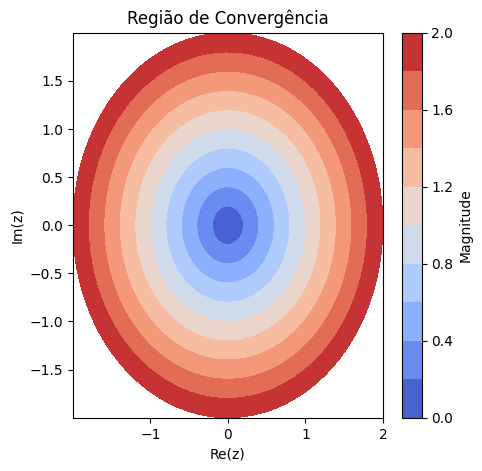

In [ ]:
import matplotlib.pyplot as plt

r = np.linspace(0, 2, 100)
theta = np.linspace(0, 2*np.pi, 100)
R, Theta = np.meshgrid(r, theta)
X = R * np.cos(Theta)
Y = R * np.sin(Theta)

plt.figure(figsize=(5,5))
plt.contourf(X, Y, R, levels=10, cmap='coolwarm')
plt.colorbar(label='Magnitude')
plt.title('Região de Convergência')
plt.xlabel('Re(z)')
plt.ylabel('Im(z)')
plt.show()

## 3. Propriedades da Transformada-z
A transformada-z possui diversas propriedades úteis que simplificam a análise de sistemas:
- **Linearidade**: Permite que a soma ponderada de duas sequências no domínio do tempo seja equivalente à soma ponderada de suas transformadas-z no domínio da frequência complexa.
- **Deslocamento no tempo**: Um deslocamento de \( k \) amostras no tempo equivale à multiplicação por \( z^{-k} \) no domínio-z.
- **Convolução**: A convolução de duas sequências no tempo resulta na multiplicação de suas transformadas-z.
- **Derivação no domínio-z**: A derivada da transformada-z em relação a \( z \) está relacionada ao produto do índice temporal pela sequência original.

Essas propriedades tornam a transformada-z uma ferramenta poderosa para análise de sistemas discretos.

### Código Python:

In [ ]:
def z_transform_shift(X_z, k, z):
    return z**(-k) * X_z

X_z = sp.symbols('X_z')
k = 2
shifted_X_z = z_transform_shift(X_z, k, z)
print("Transformada-z deslocada:", shifted_X_z)

Transformada-z deslocada: X_z/z**2


## 4. Inversa da Transformada-z
A inversa da transformada-z é usada para recuperar a sequência original no tempo discreto. Os métodos comuns para calcular essa inversa incluem:
1. **Expansão em frações parciais**: Decomposição da função em frações simples para obter a resposta no domínio do tempo.
2. **Série de Laurent**: Expansão da função em uma série infinita para recuperar os coeficientes temporais.
3. **Teorema do resíduo**: Aplicação da teoria dos resíduos para encontrar a sequência no tempo a partir dos polos da função de transferência.

### Código Python:

In [ ]:
def inverse_z_transform(X_z, z, n):
    return sp.apart(X_z, z).rewrite(sp.Heaviside).simplify()

X_z = 1 / (z - 0.5)
x_n = inverse_z_transform(X_z, z, n)
print("Transformada-z inversa:", x_n)

Transformada-z inversa: 1.0/(1.0*z - 0.5)


## 5. Representação de Sistemas no Domínio-z
A função de transferência \( H(z) \) é usada para representar sistemas no domínio-z e é definida como:
\[
H(z) = \frac{Y(z)}{X(z)}
\]
Essa equação permite determinar a resposta em frequência do sistema e analisar sua estabilidade.

### Código Python:

In [ ]:
b = [1, -0.5]
a = [1, -1.2, 0.36]
H_z = np.polyval(b, z) / np.polyval(a, z)
print("Função de Transferência H(z):", H_z)

Função de Transferência H(z): (1.0*z - 0.5)/(z*(1.0*z - 1.2) + 0.36)


## 6. Solução de Equações de Diferenças
As equações de diferenças descrevem sistemas dinâmicos discretos e podem ser resolvidas aplicando a transformada-z e sua inversa.

1. Aplicamos a transformada-z nos dois lados da equação diferencial.
2. Manipulamos a equação no domínio-z para expressá-la na forma de uma função de transferência.
3. Aplicamos a inversa da transformada-z para obter a resposta no tempo.

### Código Python:

In [ ]:
y_n = sp.symbols('y_n')
H_z = 1 / (1 - 0.5*z**-1)
y_n = inverse_z_transform(H_z, z, n)
print("Solução da equação de diferenças:", y_n)

Solução da equação de diferenças: 1.0*z/(1.0*z - 0.5)


## Conclusão
A transformada-z é uma ferramenta essencial para análise e projeto de sistemas discretos. Suas propriedades simplificam a análise de estabilidade e resposta em frequência, sendo amplamente utilizada no processamento digital de sinais e controle digital.

